# 利用Tensorflow模拟函数

In [1]:
"""本文件func:
    使用基于ReLU的神经网络来拟合自定义函数：sin(x)+cos(x)^2
    自行在函数上采样生成训练集和测试集，使用训练集来训练神经网络，使用测试集来验证拟合效果
"""

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Epoch [100/800], Loss: 0.5156
Epoch [200/800], Loss: 0.4558
Epoch [300/800], Loss: 0.2874
Epoch [400/800], Loss: 0.0657
Epoch [500/800], Loss: 0.0289
Epoch [600/800], Loss: 0.0148
Epoch [700/800], Loss: 0.0090
Epoch [800/800], Loss: 0.0066
R^2 value: 0.9920


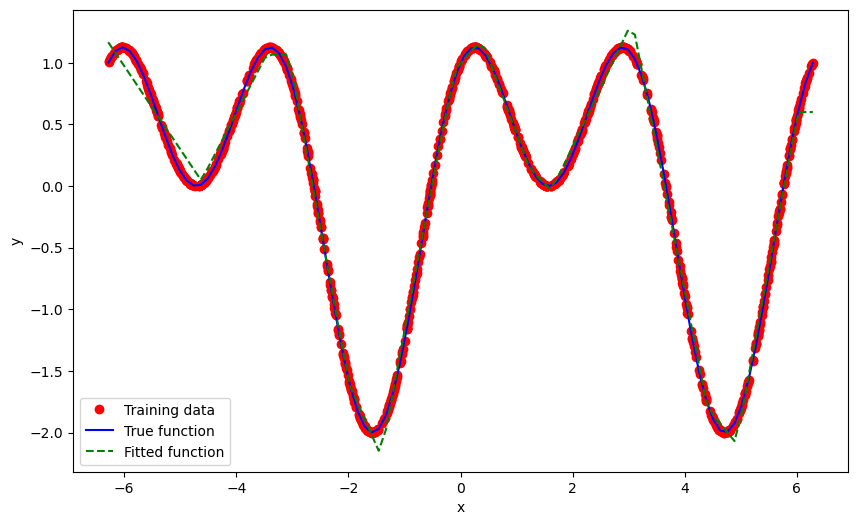

In [4]:
# 自定义函数：sin(x)+cos(x)^2
def custom_function(x):
    return np.sin(x) + np.cos(2*x)

# 生成训练集和测试集
np.random.seed(0)
num_samples = 1000
X_train = np.random.uniform(-2*np.pi, 2*np.pi, num_samples).reshape(-1, 1)
y_train = custom_function(X_train)
X_test = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
y_test = custom_function(X_test)

# 定义ReLU神经网络模型
class ReLU(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ReLU, self).__init__()
        self.f1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.f2 = nn.Linear(hidden_dim, hidden_dim)
        self.f3 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.relu(self.f1(x))
        x = self.relu(self.f2(x))
        x = self.f3(x)
        return x

# 训练模型 定义超参数
input_dim = 1
hidden_dim = 10
learning_rate = 0.01
num_epochs = 800


# 使用MSE计算loss
model = ReLU(input_dim, hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    inputs = torch.Tensor(X_train)
    targets = torch.Tensor(y_train)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型并绘制
with torch.no_grad():
    model.eval()
    inputs = torch.Tensor(X_test)
    outputs = model(inputs).numpy()

# 打印准确率
RSS = np.sum((outputs - y_test) ** 2)

# 计算总平方和
mean_y_test = np.mean(y_test)
TSS = np.sum((y_test - mean_y_test) ** 2)

# 计算R^2值
r_squared = 1 - (RSS / TSS)

print(f'R^2 value: {r_squared:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Training data')
plt.plot(X_test, y_test, 'b-', label='True function')
plt.plot(X_test, outputs, 'g--', label='Fitted function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

